# Satisfação de passageiros em vôos de companhia aérea
---
## Contexto

Projeto apresentado no módulo de Machine Learning I do curso de Ciência de Dados pelo programa [Santander Coders](https://letscode.com.br/processos-seletivos/santander-coders?_gl=1*64jvis*_ga*MTc0MTY2OTM5Ni4xNjg3ODM0MDg3*_ga_6K6NJK2FV3*MTY4NzgzNDA4Ny4xLjEuMTY4NzgzNDE3Mi4wLjAuMA..), ministrado pela [Ada](https://ada.tech/), sob orientação do professor [Thiago Marto](https://www.linkedin.com/in/tiagosmrm/).

Os integrantes do grupo são:

- [Cátia Yamamura](https://www.linkedin.com/in/catia-yamamura/)
- [Eduardo Acrani](https://www.linkedin.com/in/eduardo-acrani-ruivo-0219041b7/)
- [Jadhy Lima](https://www.linkedin.com/in/jadhy-lima/)
- [Laercio Candido](https://www.linkedin.com/in/laerciocandido/)
- [Poliana Ferreira](https://www.linkedin.com/in/poliana-nascimento-ferreira/)



## Introdução

Neste projeto vamos analisar dados de uma pesquisa com passageiros de companhias aéreas dos Estados Unidos e criar modelos que prevejam a satisfação deles. Será interessante se esse modelo identificar quais fatores mais influenciam na satisfação, pois pode ajudar as companhias aéreas a:
- identificar áreas de melhoria, levando em consideração os fatores que mais afetam a satisfação do passageito, a fim de aprimorar a experiência dele;
- tomar decisões estratégicas para melhorar a qualidade do atendimento ao cliente;
- criar campanhas mais efetivas que atendam as expectativas dos passageiros;
- realizar pesquisas adicionais mais focadas nos insights extraídos da análise do problema.


## Dataset

O dataset utilizado foi extraído do [Kaggle](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction), e será utilizado para a identificação da satisfação dos passageiros, ou seja, um problema de classificação binária. O dataset possui 129880 registros e 24 colunas, sendo:

* **id**: Número identificador de cada cliente

* **satisfaction_v2** - Nível de satisfação da companhia aérea (satisfeito / neutro or insatisfeito)

* **Gender** - Gênero dos passageiros (Feminino / Masculino)

* **Customer Type** - Tipo de cliente (Cliente leal / cliente desleal)

* **Age** - Idade dos passageiros

* **Type of Travel** - Propósito da viagem dos passageiros (Viagem pessoal / Viagem de negócios)

* **Class** - Classe de viagem no avião dos passageiros (Executiva / Econômica / Econômica Plus)

* **Flight Distance** - Distância do voo da viagem

* **Inflight wifi service** - Nível de satisfação do serviço de Wi-Fi a bordo (0 a 5)

* **Departure/Arrival time convenient** - Nível de satisfação em relação à conveniência do horário de partida/chegada (0 a 5)

* **Ease of Online booking** - Nível de satisfação da reserva online (0 a 5)

* **Gate location** - Nível de satisfação da localização do portão de embarque (0 a 5)

* **Food and drink** - Nível de satisfação da comida e bebida (0 a 5)

* **Online boarding** - Nível de satisfação do embarque online (0 a 5)

* **Seat comfort** - Nível de satisfação do conforto do assento (0 a 5)

* **Inflight entertainment** - Nível de satisfação do entretenimento a bordo (0 a 5)

* **On-board service** - Nível de satisfação do serviço a bordo (0 a 5)

* **Leg room service** - Nível de satisfação do serviço de espaço para as pernas (0 a 5)

* **Baggage handling** - Nível de satisfação do manuseio de bagagem (0 a 5) - Coincidentemente, não teve nenhuma ocorrencia de nota 0 neste fator.

* **Check-in service** - Nível de satisfação do serviço de check-in (0 a 5)

* **Inflight service** - Nível de satisfação do serviço a bordo (0 a 5)

* **Cleanliness** - Nível de satisfação da limpeza (0 a 5)

* **Departure Delay in Minutes** - Minutos de atraso na partida

* **Arrival Delay in Minutes** - Minutos de atraso na chegada



## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Processamento e auxiliares
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn import set_config

#Métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score, accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Importando os dados

df = pd.read_csv("satisfaction.csv")
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Vamos verificar o comportamentos das variáveis no dataset, em relação ao tipo, quantidades de observações não nulas e se há dados duplicados, para evitar os problemas de vazamento de dados, que pode comprometer o modelo



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [4]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
for column in ["satisfaction_v2", "Gender", "Customer Type","Type of Travel", "Class"]:
    print(f"Coluna: {column}")
    print(df[column].value_counts(normalize=True) * 100)
    print(f'\n{"="*80}\n')

Coluna: satisfaction_v2
satisfied                  54.73283
neutral or dissatisfied    45.26717
Name: satisfaction_v2, dtype: float64


Coluna: Gender
Female    50.738374
Male      49.261626
Name: Gender, dtype: float64


Coluna: Customer Type
Loyal Customer       81.690791
disloyal Customer    18.309209
Name: Customer Type, dtype: float64


Coluna: Type of Travel
Business travel    69.058362
Personal Travel    30.941638
Name: Type of Travel, dtype: float64


Coluna: Class
Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: Class, dtype: float64




Verificaremos se existe algum ID duplicado.

In [6]:
len(df['id'].unique())

129880

Notamos que não existe nenhum ID duplicados e como a coluna `id` indica apenas o identificador do cliente, torna-se irrelevante para as análises do modelo. Sendo assim, iremos excluí-la.

In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.head(1)

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


Percebemos também, que existem 393 valores nulos na coluna "Arrival Delay in Minutes" e decidimos fazer uma análise sobre esses dados.

In [9]:
df[df.isna().any(axis=1)]

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,neutral or dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


Utilizando da lógica, imaginamos que o tempo de atraso da chegada deve estar relacionado com o tempo de atraso da saída e decidimos verificar a relação entre eles.

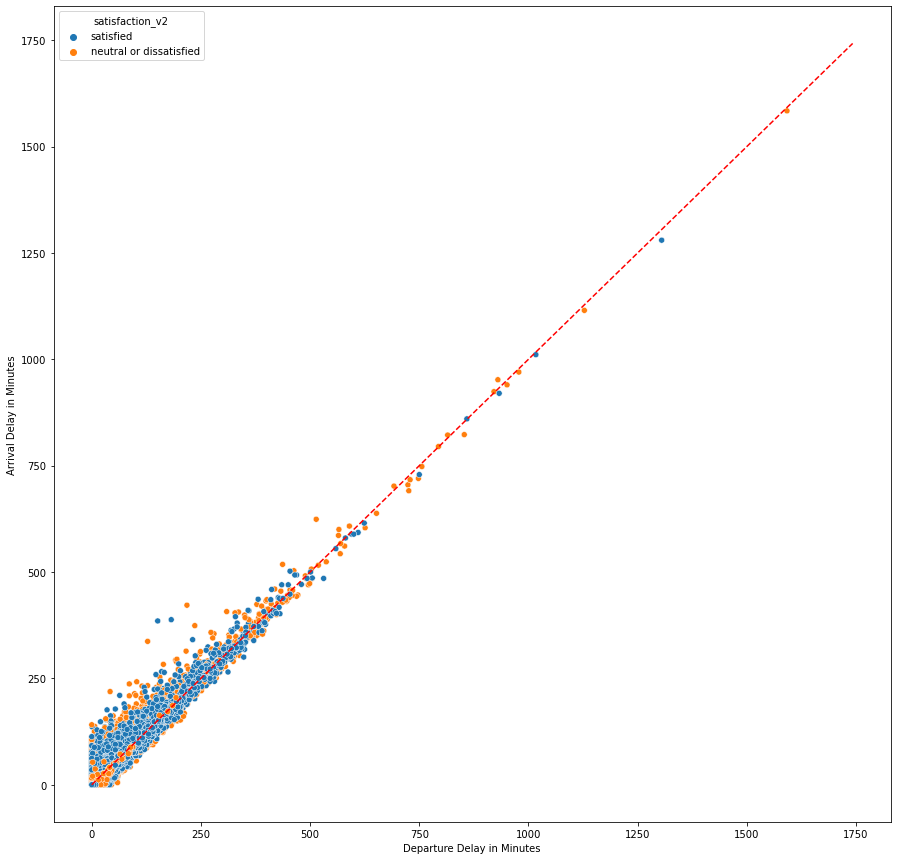

In [10]:
plt.figure(figsize=(15,15))
sns.scatterplot(data = df, x = 'Departure Delay in Minutes', y = "Arrival Delay in Minutes", hue = 'satisfaction_v2')

xl = np.arange(min(df["Arrival Delay in Minutes"]), 1.2*max(df["Arrival Delay in Minutes"]), (max(df["Arrival Delay in Minutes"])-min(df["Arrival Delay in Minutes"]))/10)
yl = xl
plt.plot(xl, yl, 'r--')

Com isso, vimos que existe uma relação linear entre as duas variáveis. Com isso, temos 3 opções:

* Eliminar esses dados da tabela, pois representam aproximadamente 0,3% dos dados totais;
* Substituir os valores Nulos do atraso na chegada para que sejam igual aos valores do atraso na saída;
* Preencher com os valores da mediana para que esses dados não distorçam a distribuição.

As duas últimas opções preservam as restantes características das outras colunas e impede a possibilidade de um desbalanceamento nos dados. Sendo assim vamos analisar qual a mais viável.

#### Primeira Análise: Preenche os nulos com o valor da mediana

In [11]:
df_mediana = df.copy()
df_mediana['Arrival Delay in Minutes'].fillna(df_mediana['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [12]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [13]:
df_mediana['Arrival Delay in Minutes'].describe()

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

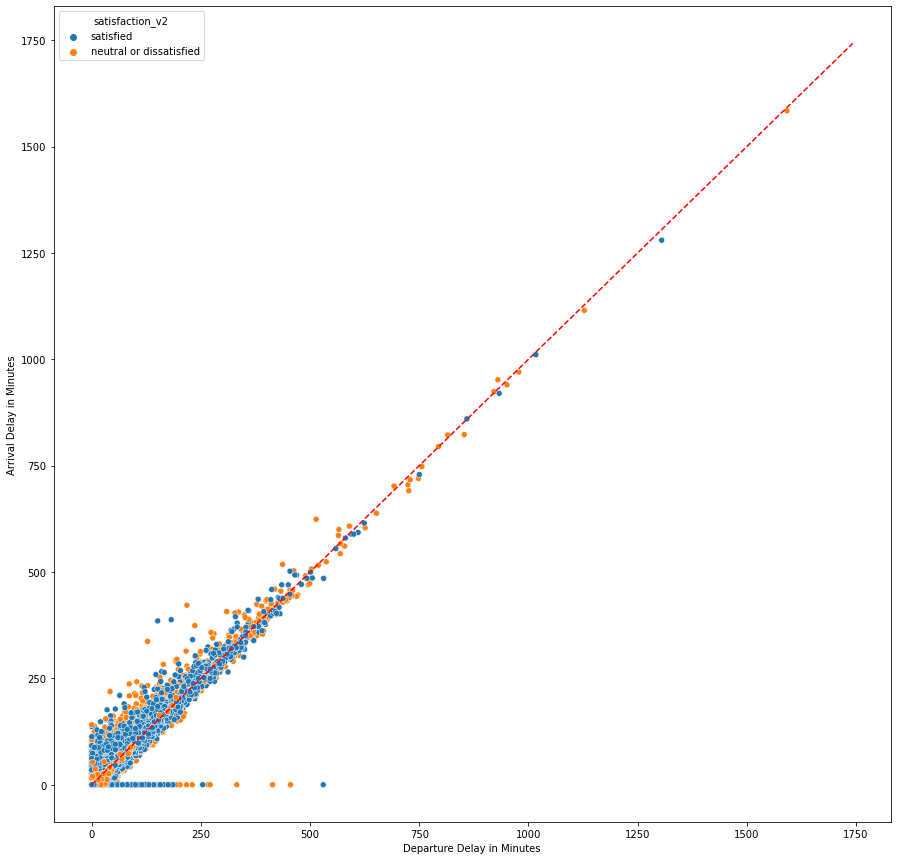

In [14]:
plt.figure(figsize=(15,15))
sns.scatterplot(data = df_mediana, x = 'Departure Delay in Minutes', y = "Arrival Delay in Minutes", hue = 'satisfaction_v2')

xl = np.arange(min(df_mediana["Arrival Delay in Minutes"]), 1.2*max(df_mediana["Arrival Delay in Minutes"]), (max(df_mediana["Arrival Delay in Minutes"])-min(df_mediana["Arrival Delay in Minutes"]))/10)
yl = xl
plt.plot(xl, yl, 'r--')

Como podemos observar, os dados preenchidos com a mediana não distorceu a distruibuição dos valores. Porém, ao comparamos novamente as duas variáveis de atraso, elas não seguiram o comportamente dos outros valores.

#### Segunda Análise: Substituir os valores de atraso de chegada para serem iguais aos atraso de saída

In [15]:
df_substu = df.copy()
df_substu['Arrival Delay in Minutes'].fillna(df_substu['Departure Delay in Minutes'], inplace = True)

In [16]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [17]:
df_substu['Arrival Delay in Minutes'].describe()

count    129880.000000
mean         15.160102
std          38.599601
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

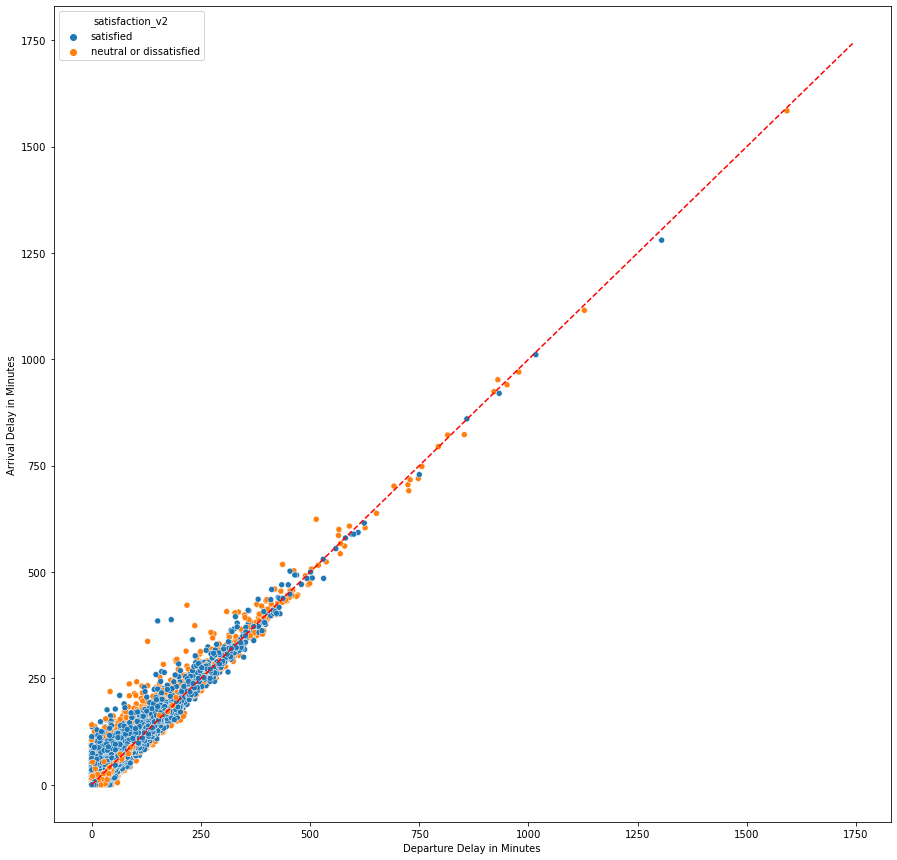

In [18]:
plt.figure(figsize=(15,15))
sns.scatterplot(data = df_substu, x = 'Departure Delay in Minutes', y = "Arrival Delay in Minutes", hue = 'satisfaction_v2')

xl = np.arange(min(df_substu["Arrival Delay in Minutes"]), 1.2*max(df_substu["Arrival Delay in Minutes"]), (max(df_substu["Arrival Delay in Minutes"])-min(df_substu["Arrival Delay in Minutes"]))/10)
yl = xl
plt.plot(xl, yl, 'r--')

A partir disso, decidimos prosseguir com a opção de substituir os valores da segunda análise

### Analisando os Outliers

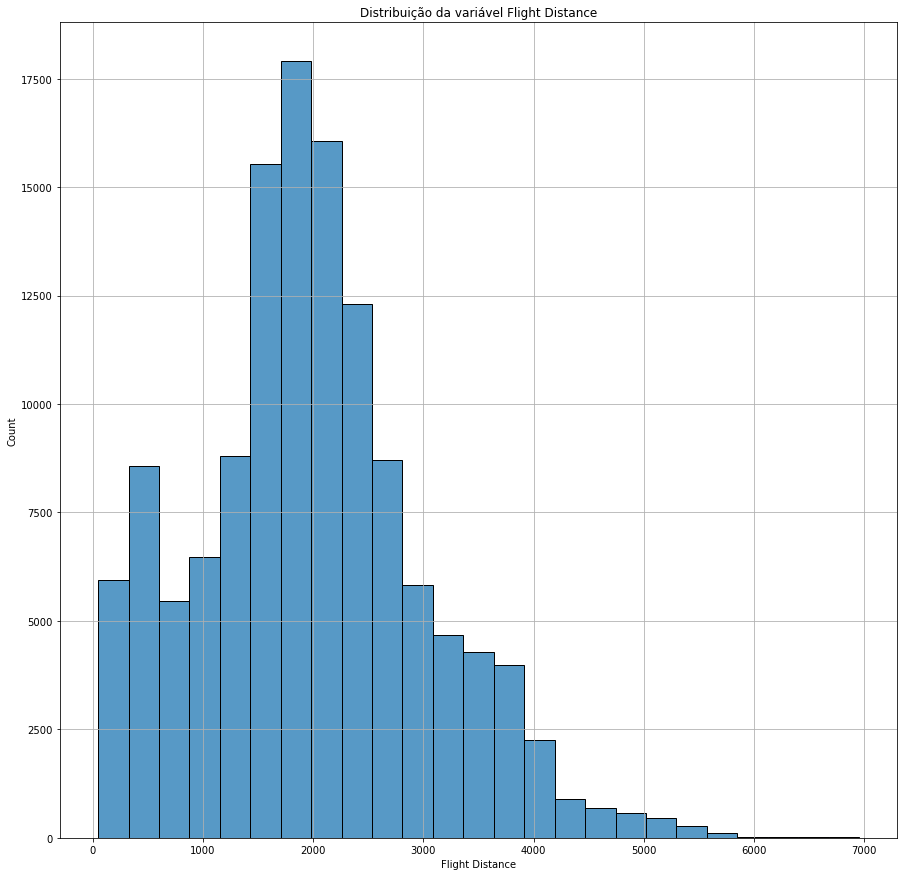

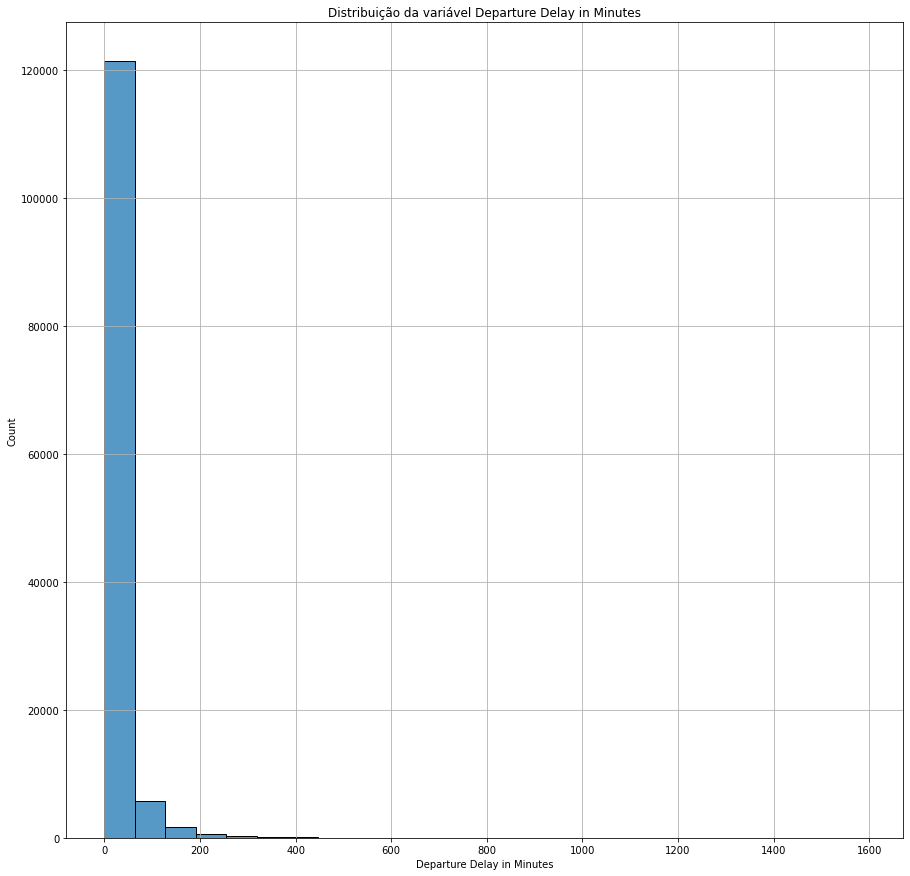

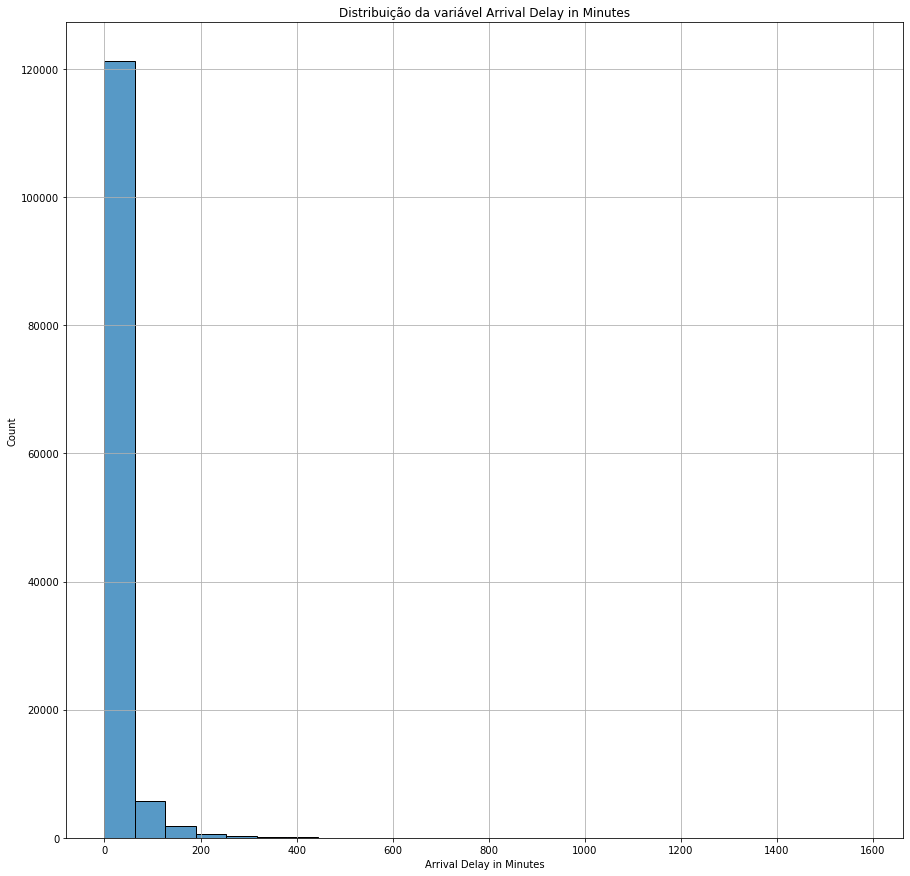

In [19]:
# visualizando distribuições com histogramas

selecao = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

for col in selecao:
    plt.figure(figsize=(15,15))
    sns.histplot(data=df_substu, x=col, bins = 25).set_title(f"Distribuição da variável {col}", )
    plt.grid()
    plt.show()

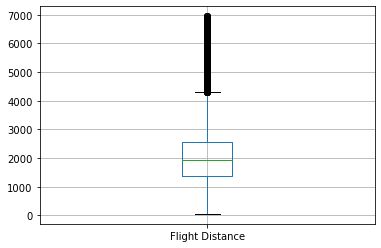

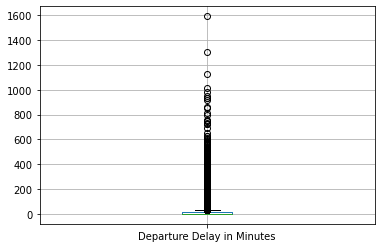

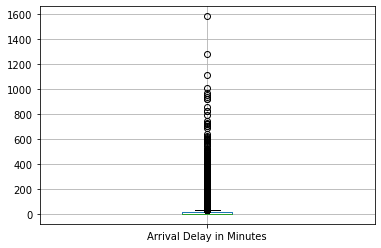

In [20]:
for column in selecao:
    plt.figure()
    df.boxplot([column])

In [21]:
df_desc = df.describe()
df_desc.loc['IQR'] = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc.loc['Limite superior'] = df_desc.loc['75%'] + 1.5*df_desc.loc['IQR']
df_desc.loc['Limite inferior'] = df_desc.loc['25%'] - 1.5*df_desc.loc['IQR']
df_desc

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000
IQR,24.000000,1185.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,12.000000,13.000000
Limite superior,87.000000,4321.500000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,9.500000,5.500000,9.500000,8.000000,5.500000,8.000000,7.000000,30.000000,32.500000


In [22]:
len(df[df["Arrival Delay in Minutes"] > 32.5 ])

17492

In [23]:
## Método: |z| > 3.

for col in selecao:

    mu = df[col].mean()
    std = df[col].std()

    # será outlier se |z| > 3
    aux_outliers = df[col].apply(lambda x : (x - mu)/std).apply(lambda x : np.abs(x) > 3)

    indices_outliers = aux_outliers[aux_outliers].index.tolist()

    if len(indices_outliers) >= 1:

        print(f"A coluna {col} tem {len(indices_outliers)} outliers!")
        print("\nOs índices deles são:\n")
        print(indices_outliers)

    else:

        print(f"A coluna {col} não tem outliers!")

    print(f'\n{"="*80}\n')


A coluna Flight Distance tem 830 outliers!

Os índices deles são:

[540, 588, 1160, 1161, 1664, 2859, 5885, 5886, 7630, 9071, 9613, 9614, 12861, 12862, 12863, 15497, 16386, 18607, 20439, 20628, 21586, 22092, 22692, 24382, 27712, 28522, 29894, 31462, 31934, 32188, 32805, 33326, 34157, 35567, 36443, 36549, 39838, 40242, 43385, 44264, 46077, 46368, 46734, 49083, 50310, 51557, 52143, 52715, 53482, 53833, 57233, 60701, 61958, 63597, 63697, 64194, 64452, 64539, 64681, 65309, 65313, 65370, 65380, 65775, 65891, 66015, 66073, 66199, 66429, 66493, 66743, 66746, 66749, 66779, 66810, 66846, 66870, 66930, 66991, 66993, 67092, 67122, 67130, 67132, 67249, 67251, 67333, 67337, 67414, 67448, 67772, 67806, 67834, 68184, 68203, 68204, 68205, 68209, 68244, 68268, 68301, 68431, 68432, 68450, 68472, 68506, 68651, 68739, 68945, 69126, 69332, 69426, 69457, 69492, 69690, 69744, 69819, 69934, 70046, 70093, 70495, 70582, 70615, 70665, 70727, 70917, 70918, 71000, 71145, 71167, 71258, 71286, 71444, 71451, 71498, 7

A coluna Arrival Delay in Minutes tem 2742 outliers!

Os índices deles são:

[1, 41, 226, 243, 419, 460, 566, 605, 627, 857, 884, 894, 901, 904, 908, 970, 991, 1058, 1071, 1129, 1209, 1222, 1303, 1310, 1319, 1348, 1401, 1415, 1453, 1481, 1490, 1547, 1608, 1711, 1839, 1859, 1866, 2013, 2028, 2062, 2088, 2099, 2116, 2171, 2182, 2193, 2200, 2207, 2271, 2276, 2368, 2388, 2435, 2441, 2532, 2542, 2585, 2653, 2707, 2728, 2729, 2787, 2835, 2862, 2868, 2902, 2903, 2970, 3000, 3083, 3097, 3178, 3255, 3274, 3301, 3353, 3380, 3420, 3470, 3482, 3539, 3543, 3555, 3595, 3718, 3758, 3764, 3879, 3925, 3983, 4227, 4276, 4292, 4295, 4296, 4310, 4402, 4573, 4603, 4727, 4766, 4778, 4810, 4842, 4861, 4865, 4922, 4972, 4975, 5069, 5086, 5098, 5269, 5422, 5530, 5543, 5558, 5621, 5741, 5747, 5788, 5801, 5830, 5851, 6004, 6012, 6169, 6220, 6267, 6310, 6421, 6423, 6494, 6497, 6616, 6733, 6735, 6783, 6915, 6950, 6970, 7011, 7031, 7072, 7074, 7082, 7163, 7200, 7221, 7222, 7239, 7259, 7343, 7351, 7411, 7468, 7481, 

Após todas essas análises, foi decidido que será eliminado as linhas que os valores de "Arrival Delay in Minutes" sejam maiores quem 200 para que o Scaler fique menos distorcido e, ainda sim, não interferindo nem em 1% dos máximo de dados.

In [24]:
df = df_substu[df_substu['Arrival Delay in Minutes'] <= 200]
df

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0


### Tratando as variáveis Categóricas

O novo dataset tem 23 colunas e 128882 linhas, sem duplicatas de dados e com os "outliers" eliminados.

Observamos que o dataset contem variáveis categóricas e numéricas, divididas em:

* **categóricas**: `satisfaction_v2`, `Gender`, `Customer Type`, `Type of Travel` e `Class`
* **numéricas**: `Age`, `Flight Distance`, `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`,
`Food and drink`,`Online boarding`,`Seat comfort`, `Inflight entertainment`,
`On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`,
`Inflight service`, `Cleanliness`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`



Vamos ver quantas observações há nas variáveis categóricas:

In [25]:
for column in ["satisfaction_v2", "Gender", "Customer Type","Type of Travel", "Class"]:
    print(f"Coluna: {column}")
    print(df[column].value_counts(normalize=True) * 100)
    print(f'\n{"="*80}\n')

Coluna: satisfaction_v2
satisfied                  54.872674
neutral or dissatisfied    45.127326
Name: satisfaction_v2, dtype: float64


Coluna: Gender
Female    50.740212
Male      49.259788
Name: Gender, dtype: float64


Coluna: Customer Type
Loyal Customer       81.694108
disloyal Customer    18.305892
Name: Customer Type, dtype: float64


Coluna: Type of Travel
Business travel    69.040673
Personal Travel    30.959327
Name: Type of Travel, dtype: float64


Coluna: Class
Business    47.875576
Eco         44.871278
Eco Plus     7.253146
Name: Class, dtype: float64




É importante observar que as colunas `Customer Type`, `Type of Travel` e `Class`estão desbalanceadas.

Para simplificar a análise exploratória e identificar padrões e relacionamentos vamos transformar as variáveis categóricas em variáveis numéricas

In [26]:
# tranformando as variáveis categóricas em numéricas

df['satisfaction_v2'] = df['satisfaction_v2'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer' : 0, 'Loyal Customer' : 1})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df['Class'] = df['Class'].map({'Eco' : 0, 'Eco Plus' : 1, 'Business' : 2})
df

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,65,0,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,1,1,1,15,0,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,0,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,0,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,1,0,1,30,0,0,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,1,0,11,0,0,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,0.0
129875,1,1,0,29,0,0,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,0,63,0,2,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,0,69,0,0,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0


Vamos ver como as variáveis se comportam em relação a estatísticas descritivas

In [27]:
# obtendo estatísticas descritivas

df.describe()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,...,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000,128882.000000
mean,0.548727,0.507402,0.816941,39.436841,0.690407,1.030043,1973.644147,2.839403,2.989797,2.852664,...,3.521679,3.474271,3.467156,3.484660,3.695318,3.341398,3.709797,3.353269,12.611288,12.996330
std,0.497622,0.499947,0.386716,15.118941,0.462328,0.962587,1023.362020,1.393933,1.527600,1.444244,...,1.305910,1.305659,1.270138,1.293554,1.157045,1.259781,1.149732,1.298222,27.592602,27.907931
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1352.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1917.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,2.000000,2536.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,223.000000,200.000000


As variáveis aparentam ter um comportamento esperado, sem inconsistências de valores.

Agora veremos a correlação entre as variáveis e, principalmente, como elas se relacionam com a variável que mede a satisfação dos clientes

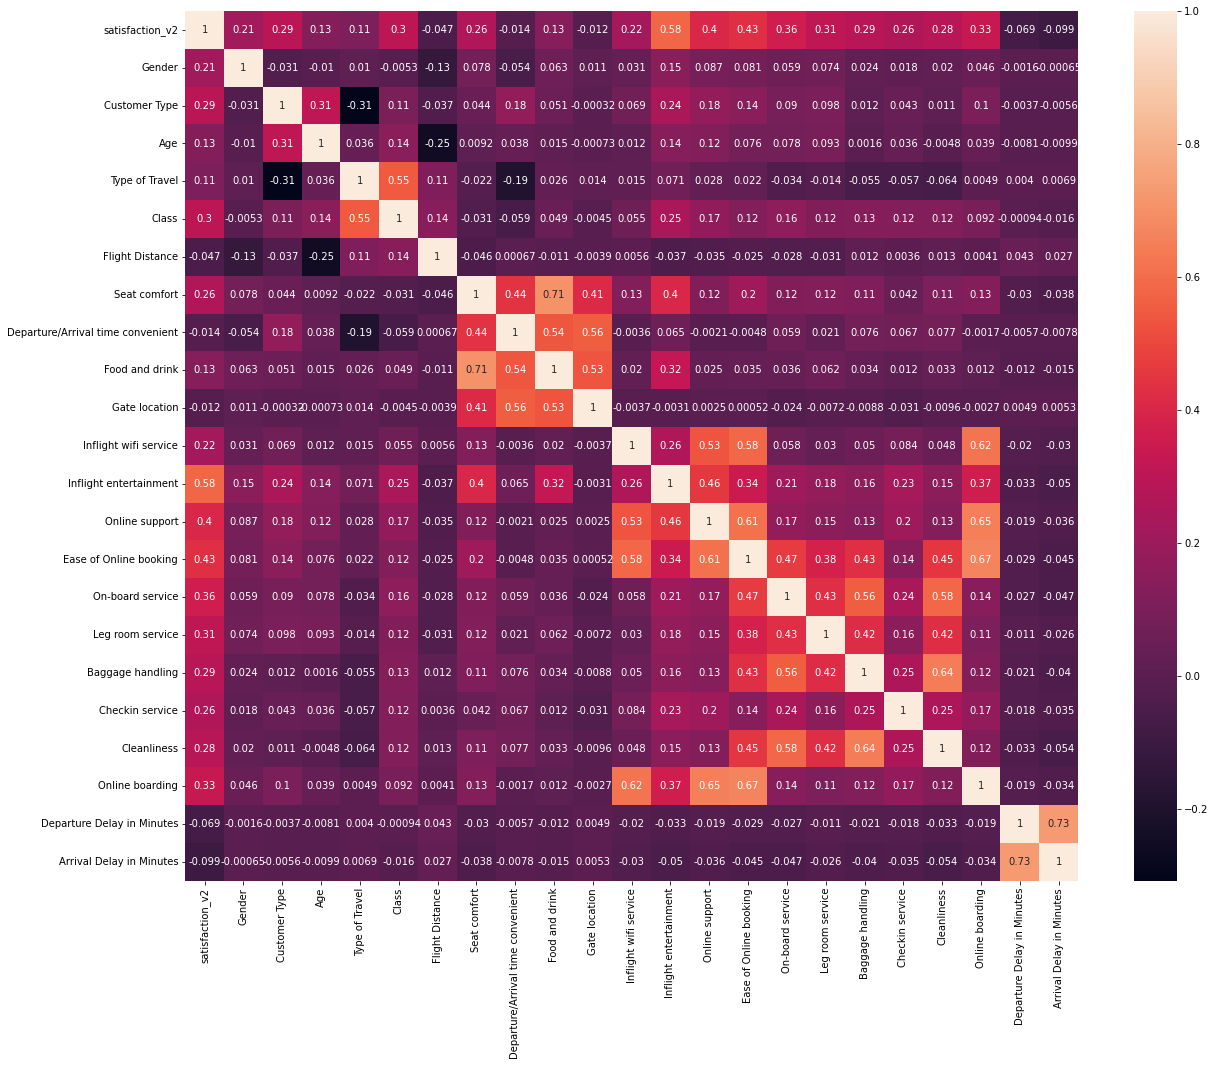

In [28]:
plt.figure(figsize=(20, 16))

sns.heatmap(df.corr(method="spearman"), annot=True);

In [29]:
df.corr()['satisfaction_v2'].sort_values(ascending=False)

satisfaction_v2                      1.000000
Inflight entertainment               0.524275
Ease of Online booking               0.432867
Online support                       0.389601
On-board service                     0.353518
Online boarding                      0.337478
Leg room service                     0.306305
Class                                0.304389
Customer Type                        0.293694
Checkin service                      0.264893
Baggage handling                     0.261036
Cleanliness                          0.258588
Seat comfort                         0.241666
Inflight wifi service                0.223570
Gender                               0.213950
Food and drink                       0.120148
Age                                  0.117504
Type of Travel                       0.107172
Gate location                       -0.011767
Departure/Arrival time convenient   -0.014958
Flight Distance                     -0.039076
Departure Delay in Minutes        

## Função para exibir as métricas da classificação

In [30]:
def exibir_metricas(y_train, y_pred_train, y_test, y_pred_test):
    print("\nMétricas de avaliação de treino:")

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    print("\n# =======================================================\n")

    print("\nMétricas de avaliação de teste:")

    print(confusion_matrix(y_test, y_pred_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [31]:
# por motivos de: Não quero queimar o meu pc. Decidimos pegar 13k de dados e não 130k
df_10 = df.groupby('satisfaction_v2',group_keys = False).apply(lambda x: x.sample(frac=0.1))
df_90 = df.drop(df_10.index)

In [32]:
df_10.shape

(12888, 23)

In [33]:
df_90.shape

(115994, 23)

# Regressão Logística

## Pipeline com grid e cross-validation para Regressão Logística

In [34]:
X = df_10.drop(columns=['satisfaction_v2'])
y = df_10['satisfaction_v2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("poly", PolynomialFeatures()),
                ("lr", LogisticRegression(max_iter = 1000))]

pipe = Pipeline(lista_etapas)
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [36]:
metrica = make_scorer(accuracy_score)

# ====================
param_dict = {"lr__solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              "poly__degree": range(2,4)}

#verbose=10 pra muitas combinações, os prints vão pro terminal
grid_lr = RandomizedSearchCV(pipe, 
                             param_dict,
                             scoring= metrica,
                             cv=splitter,
                             verbose=10,
                             n_iter = 10)

grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START lr__solver=newton-cholesky, poly__degree=2.................
[CV 1/5; 1/10] END lr__solver=newton-cholesky, poly__degree=2;, score=0.914 total time=   0.0s
[CV 2/5; 1/10] START lr__solver=newton-cholesky, poly__degree=2.................
[CV 2/5; 1/10] END lr__solver=newton-cholesky, poly__degree=2;, score=0.919 total time=   0.0s
[CV 3/5; 1/10] START lr__solver=newton-cholesky, poly__degree=2.................
[CV 3/5; 1/10] END lr__solver=newton-cholesky, poly__degree=2;, score=0.918 total time=   0.0s
[CV 4/5; 1/10] START lr__solver=newton-cholesky, poly__degree=2.................
[CV 4/5; 1/10] END lr__solver=newton-cholesky, poly__degree=2;, score=0.923 total time=   0.0s
[CV 5/5; 1/10] START lr__solver=newton-cholesky, poly__degree=2.................
[CV 5/5; 1/10] END lr__solver=newton-cholesky, poly__degree=2;, score=0.926 total time=   0.0s
[CV 1/5; 2/10] START lr__solver=newton-cholesky, poly__degr

[CV 4/5; 10/10] END lr__solver=newton-cg, poly__degree=3;, score=0.902 total time=  17.5s
[CV 5/5; 10/10] START lr__solver=newton-cg, poly__degree=3......................
[CV 5/5; 10/10] END lr__solver=newton-cg, poly__degree=3;, score=0.912 total time=  17.2s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('lr',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'lr__solver': ['lbfgs', 'liblinear',
                                                       'newton-cg',
                                                       'newton-cholesky', 'sag',
                                                       'saga'],
                                        'poly__degree': range(2, 4)},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [37]:
print('Melhores Parâmetros:')
print(grid_lr.best_params_)
print('Melhor Métrica Média:')
print(grid_lr.best_score_)

Melhores Parâmetros:
{'poly__degree': 3, 'lr__solver': 'sag'}
Melhor Métrica Média:
0.9252182347235693


In [38]:
y_pred_test = grid_lr.predict(X_test)
y_pred_train = grid_lr.predict(X_train)


Métricas de avaliação de treino:


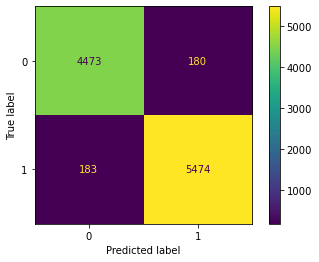

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4653
           1       0.97      0.97      0.97      5657

    accuracy                           0.96     10310
   macro avg       0.96      0.96      0.96     10310
weighted avg       0.96      0.96      0.96     10310


# =======================================================


Métricas de avaliação de teste:
[[1074   89]
 [  95 1320]]


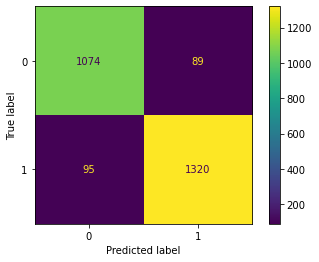

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1163
           1       0.94      0.93      0.93      1415

    accuracy                           0.93      2578
   macro avg       0.93      0.93      0.93      2578
weighted avg       0.93      0.93      0.93      2578



In [39]:
exibir_metricas(y_train, y_pred_train, y_test, y_pred_test)

# KNN

## Construção do pipeline

In [40]:
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]
pipe = Pipeline(steps)

In [41]:
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

score = make_scorer(accuracy_score)

param_dict = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(5, 20)}

rs_cv = RandomizedSearchCV(pipe,
                           param_dict,
                           scoring = score,
                           cv = cvs,
                           n_iter=20,
                           verbose = 10)

rs_cv.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 1/10; 1/20] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.898 total time=   0.1s
[CV 2/10; 1/20] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 2/10; 1/20] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.923 total time=   0.0s
[CV 3/10; 1/20] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 3/10; 1/20] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.898 total time=   0.0s
[CV 4/10; 1/20] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 4/10; 1/20] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.916 total time=   0.0s
[CV 5/10; 1/20] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 5/10; 1/20] END knn__metri

[CV 4/10; 5/20] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 4/10; 5/20] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.908 total time=   0.0s
[CV 5/10; 5/20] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 5/10; 5/20] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.899 total time=   0.0s
[CV 6/10; 5/20] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 6/10; 5/20] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.884 total time=   0.0s
[CV 7/10; 5/20] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 5/20] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 8/10; 5/20] START knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 5/20] END knn__metric=minkowski, knn__n_neighbors=10, knn__weights=distanc

[CV 5/10; 9/20] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.914 total time=   0.0s
[CV 6/10; 9/20] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 6/10; 9/20] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.901 total time=   0.0s
[CV 7/10; 9/20] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 7/10; 9/20] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.911 total time=   0.0s
[CV 8/10; 9/20] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 8/10; 9/20] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.919 total time=   0.0s
[CV 9/10; 9/20] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 9/10; 9/20] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=0.913 total time=   0.0s
[CV 10/10; 9/20] START knn__metric=manhattan, knn__n_neighbors

[CV 5/10; 13/20] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 13/20] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=0.892 total time=   0.0s
[CV 6/10; 13/20] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 13/20] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=0.884 total time=   0.0s
[CV 7/10; 13/20] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 7/10; 13/20] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=0.904 total time=   0.0s
[CV 8/10; 13/20] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 8/10; 13/20] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=0.900 total time=   0.0s
[CV 9/10; 13/20] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 9/10; 13/20] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=unifor

[CV 4/10; 17/20] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.919 total time=   0.0s
[CV 5/10; 17/20] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 5/10; 17/20] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.912 total time=   0.0s
[CV 6/10; 17/20] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 6/10; 17/20] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.900 total time=   0.0s
[CV 7/10; 17/20] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 7/10; 17/20] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.911 total time=   0.0s
[CV 8/10; 17/20] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 8/10; 17/20] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.924 total time=   0.0s
[CV 9/10; 17/20] START knn__metric=manhattan

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=20,
                   param_distributions={'knn__metric': ['manhattan',
                                                        'euclidean',
                                                        'minkowski'],
                                        'knn__n_neighbors': range(5, 20),
                                        'knn__weights': ['distance',
                                                         'uniform']},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [42]:
print('Melhores Parâmetros:')
print(rs_cv.best_params_)
print('Melhor Métrica Média:')
print(rs_cv.best_score_)

Melhores Parâmetros:
{'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'manhattan'}
Melhor Métrica Média:
0.9155189136760427


In [43]:
y_pred_test = rs_cv.predict(X_test)
y_pred_train = rs_cv.predict(X_train)


Métricas de avaliação de treino:


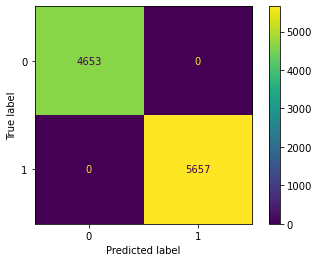

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4653
           1       1.00      1.00      1.00      5657

    accuracy                           1.00     10310
   macro avg       1.00      1.00      1.00     10310
weighted avg       1.00      1.00      1.00     10310


# =======================================================


Métricas de avaliação de teste:
[[1084   79]
 [ 118 1297]]


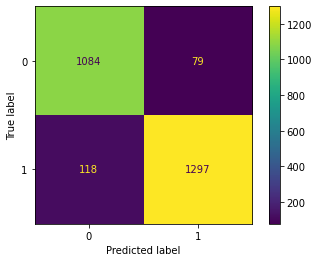

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1163
           1       0.94      0.92      0.93      1415

    accuracy                           0.92      2578
   macro avg       0.92      0.92      0.92      2578
weighted avg       0.92      0.92      0.92      2578



In [44]:
exibir_metricas(y_train, y_pred_train, y_test, y_pred_test)

# Árvore de Decisões

## Construção do pipeline

In [45]:
pipe = Pipeline([('scaler', StandardScaler()), 
                  ("dt", DecisionTreeClassifier(random_state=42))])

In [46]:
score = make_scorer(accuracy_score)

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = RandomizedSearchCV(pipe,
                       params_grid_dt,
                       scoring=score,
                       cv=splitter,
                       n_iter = 10,
                       verbose = 10)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 1/5; 1/10] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=0.836 total time=   0.0s
[CV 2/5; 1/10] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 2/5; 1/10] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=0.846 total time=   0.0s
[CV 3/5; 1/10] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 3/5; 1/10] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=0.849 total time=   0.0s
[CV 4/5; 1/10] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 4/5; 1/10] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=0.764 total time=   0.0s
[CV 5/5; 1/10] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 5/5; 1/10] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score

[CV 4/5; 9/10] END dt__criterion=gini, dt__max_depth=9, dt__splitter=best;, score=0.924 total time=   0.0s
[CV 5/5; 9/10] START dt__criterion=gini, dt__max_depth=9, dt__splitter=best.....
[CV 5/5; 9/10] END dt__criterion=gini, dt__max_depth=9, dt__splitter=best;, score=0.912 total time=   0.0s
[CV 1/5; 10/10] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random..
[CV 1/5; 10/10] END dt__criterion=gini, dt__max_depth=3, dt__splitter=random;, score=0.789 total time=   0.0s
[CV 2/5; 10/10] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random..
[CV 2/5; 10/10] END dt__criterion=gini, dt__max_depth=3, dt__splitter=random;, score=0.795 total time=   0.0s
[CV 3/5; 10/10] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random..
[CV 3/5; 10/10] END dt__criterion=gini, dt__max_depth=3, dt__splitter=random;, score=0.795 total time=   0.0s
[CV 4/5; 10/10] START dt__criterion=gini, dt__max_depth=3, dt__splitter=random..
[CV 4/5; 10/10] END dt__criterion=gini, dt__max_dep

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__max_depth': range(2, 11),
                                        'dt__splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score), verbose=10)

In [47]:
print('Melhores Parâmetros:')
print(grid_dt.best_params_)
print('Melhor Métrica Média:')
print(grid_dt.best_score_)

Melhores Parâmetros:
{'dt__splitter': 'best', 'dt__max_depth': 9, 'dt__criterion': 'gini'}
Melhor Métrica Média:
0.9138700290979631


In [48]:
y_pred_test = grid_dt.predict(X_test)
y_pred_train = grid_dt.predict(X_train)


Métricas de avaliação de treino:


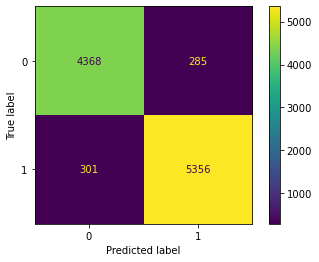

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4653
           1       0.95      0.95      0.95      5657

    accuracy                           0.94     10310
   macro avg       0.94      0.94      0.94     10310
weighted avg       0.94      0.94      0.94     10310


# =======================================================


Métricas de avaliação de teste:
[[1059  104]
 [ 118 1297]]


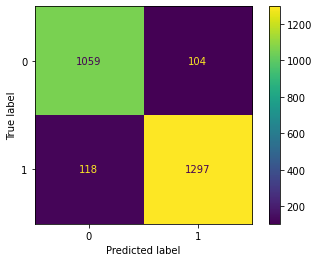

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1163
           1       0.93      0.92      0.92      1415

    accuracy                           0.91      2578
   macro avg       0.91      0.91      0.91      2578
weighted avg       0.91      0.91      0.91      2578



In [49]:
exibir_metricas(y_train, y_pred_train, y_test, y_pred_test)

## Predizendo com os 90% restantes

In [50]:
X_90 = df_90.drop(columns=['satisfaction_v2'])
y_90 = df_90['satisfaction_v2']

## KNN

In [51]:
y_pred_90 = rs_cv.predict(X_90)
y_pred_train = rs_cv.predict(X_train)


Métricas de avaliação de treino:


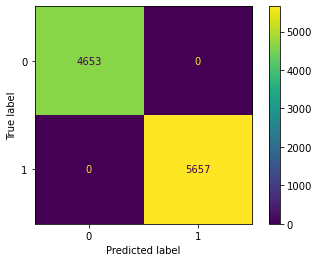

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4653
           1       1.00      1.00      1.00      5657

    accuracy                           1.00     10310
   macro avg       1.00      1.00      1.00     10310
weighted avg       1.00      1.00      1.00     10310


# =======================================================


Métricas de avaliação de teste:
[[48148  4197]
 [ 5445 58204]]


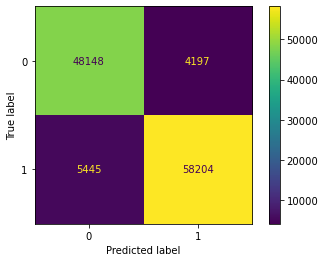

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     52345
           1       0.93      0.91      0.92     63649

    accuracy                           0.92    115994
   macro avg       0.92      0.92      0.92    115994
weighted avg       0.92      0.92      0.92    115994



In [52]:
exibir_metricas(y_train, y_pred_train, y_90, y_pred_90)

## Árvore de Decisões

In [53]:
y_pred_90 = grid_dt.predict(X_90)
y_pred_train = grid_dt.predict(X_train)


Métricas de avaliação de treino:


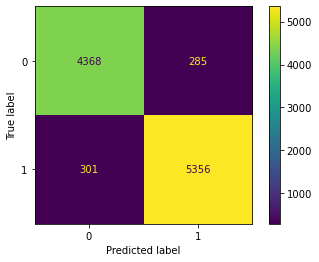

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4653
           1       0.95      0.95      0.95      5657

    accuracy                           0.94     10310
   macro avg       0.94      0.94      0.94     10310
weighted avg       0.94      0.94      0.94     10310


# =======================================================


Métricas de avaliação de teste:
[[47480  4865]
 [ 5139 58510]]


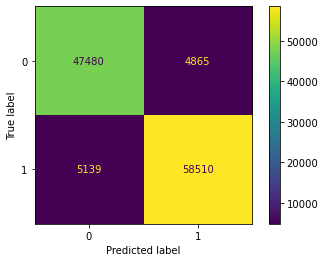

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     52345
           1       0.92      0.92      0.92     63649

    accuracy                           0.91    115994
   macro avg       0.91      0.91      0.91    115994
weighted avg       0.91      0.91      0.91    115994



In [54]:
exibir_metricas(y_train, y_pred_train, y_90, y_pred_90)